In [1]:
# Description: This program uses the on-Balance Volume (OBV) to determine when to buy or sell stock

In [2]:
# import libs
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
plt.style.use('fivethirtyeight')

In [4]:
# get data
df = pd.read_csv('Data/TSLA.csv') 
# set date as index 
df = df.set_index(pd.DatetimeIndex(df['Date'].values))
#show data
df 

,Date,Open,High,Low,Close,Adj Close,Volume
2019-09-16,2019-09-16,49.200001,49.486000,48.234001,48.562000,48.562000,23640500
2019-09-17,2019-09-17,48.493999,49.119999,48.074001,48.958000,48.958000,19327000
2019-09-18,2019-09-18,49.000000,49.633999,48.473999,48.698002,48.698002,20851000
2019-09-19,2019-09-19,49.200001,49.588001,48.967999,49.320000,49.320000,23979000
2019-09-20,2019-09-20,49.298000,49.389999,47.632000,48.124001,48.124001,31765000
...,...,...,...,...,...,...,...
2020-09-04,2020-09-04,402.809998,428.000000,372.019989,418.320007,418.320007,110321900
2020-09-08,2020-09-08,356.000000,368.739990,329.880005,330.209991,330.209991,115465700
2020-09-09,2020-09-09,356.600006,369.000000,341.510010,366.279999,366.279999,79465800
2020-09-10,2020-09-10,386.209991,398.989990,360.559998,371.339996,371.339996,84930600


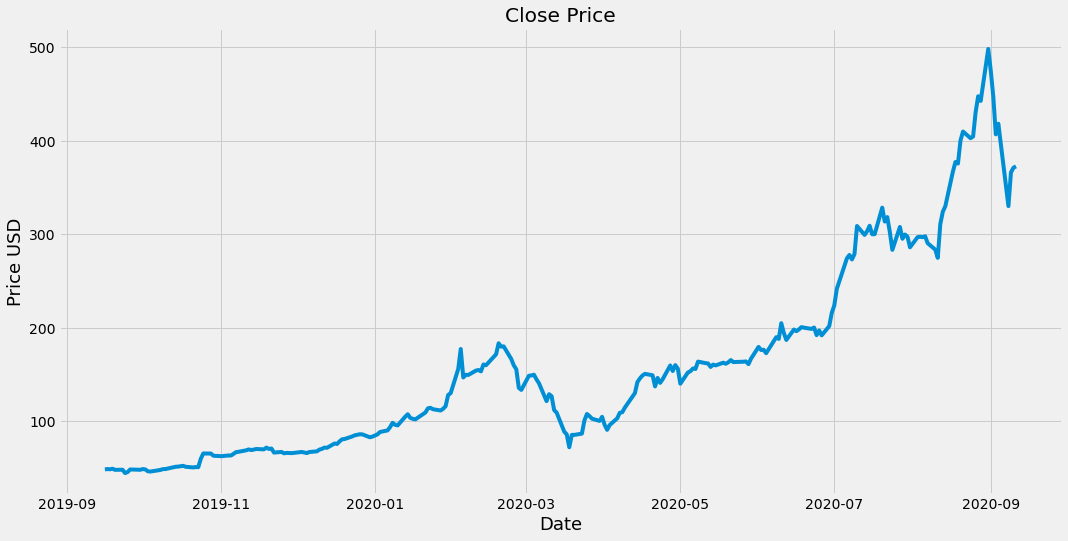

In [5]:
# visually show the stock price
plt.figure(figsize=(16,8))
plt.plot(df['Close'], label='Close')
plt.title('Close Price')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Price USD', fontsize=18)
plt.show()

In [7]:
# Calculate the OBV
OBV = []
OBV.append(0)

# Loop through the data set (close price) from the second row (index 1) to the end of the data set
for i in range(1, len(df.Close)):
    if df.Close[i] > df.Close[i-1]:
        OBV.append(OBV[-1] + df.Volume[i])
    elif df.Close[i] < df.Close[i-1]:
        OBV.append(OBV[-1] - df.Volume[i])
    else:
        OBV.append(OBV[-1])

In [8]:
# Store the OBV and OBV EMA into new columns
df['OBV'] = OBV 
df['OBV_EMA'] = df['OBV'].ewm(span=20).mean()
# show the data
df 

,Date,Open,High,Low,Close,Adj Close,Volume,OBV,OBV_EMA
2019-09-16,2019-09-16,49.200001,49.486000,48.234001,48.562000,48.562000,23640500,0,0.000000e+00
2019-09-17,2019-09-17,48.493999,49.119999,48.074001,48.958000,48.958000,19327000,19327000,1.014668e+07
2019-09-18,2019-09-18,49.000000,49.633999,48.473999,48.698002,48.698002,20851000,-1524000,5.861273e+06
2019-09-19,2019-09-19,49.200001,49.588001,48.967999,49.320000,49.320000,23979000,22455000,1.065163e+07
2019-09-20,2019-09-20,49.298000,49.389999,47.632000,48.124001,48.124001,31765000,-9310000,5.823078e+06
...,...,...,...,...,...,...,...,...,...
2020-09-04,2020-09-04,402.809998,428.000000,372.019989,418.320007,418.320007,110321900,3620901400,3.503334e+09
2020-09-08,2020-09-08,356.000000,368.739990,329.880005,330.209991,330.209991,115465700,3505435700,3.503534e+09
2020-09-09,2020-09-09,356.600006,369.000000,341.510010,366.279999,366.279999,79465800,3584901500,3.511283e+09
2020-09-10,2020-09-10,386.209991,398.989990,360.559998,371.339996,371.339996,84930600,3669832100,3.526383e+09


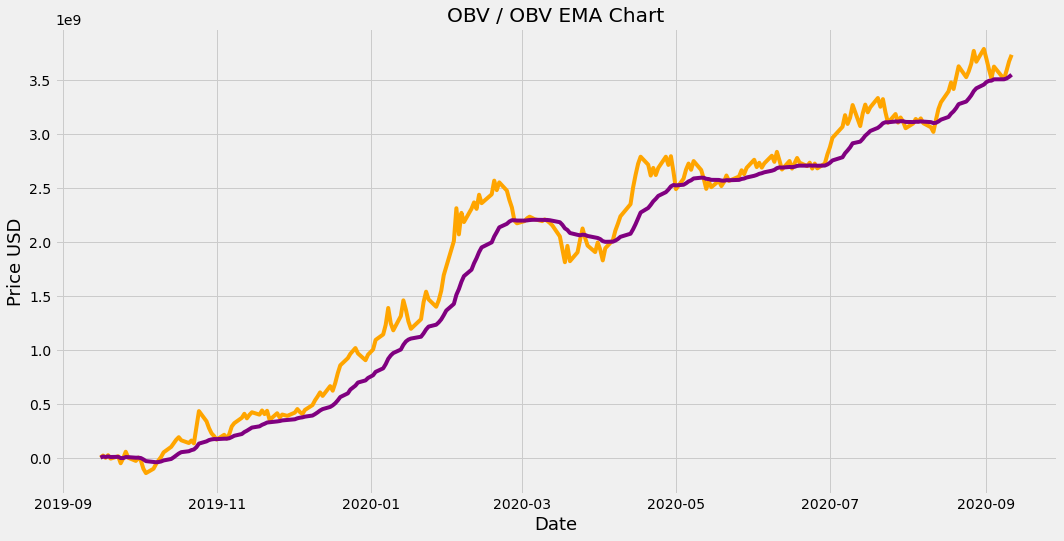

In [9]:
# put it in a graph
plt.figure(figsize=(16,8))
plt.plot(df['OBV'], label='OBV', color='orange')
plt.plot(df['OBV_EMA'], label='OBV-EMA', color='purple')
plt.title('OBV / OBV EMA Chart')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Price USD', fontsize=18)
plt.show() 

In [19]:
# Create a function to signal when to buy and sell the stock
# if OBV > OBV_EMA, then buy
# if OBV < OBV_EMA, then sell 
# else do nothing

def buy_sell(signal, col1, col2):
    sigPriceBuy = []
    sigPriceSell = []
    flag = -1
    # Loop through the length of the data set
    for i in range(0, len(signal)):
        # if OBV > OBV_EMA, then buy -> col1 => OBV and col2 => OBV_EMA
        if signal[col1][i] > signal[col2][i] and flag != 1:
            sigPriceBuy.append(signal['Close'][i])
            sigPriceSell.append(np.nan)
            flag = 1
        # IF OBV < OBV EMA, then sell
        elif signal[col1][i] < signal[col2][i] and flag != 0:
            sigPriceSell.append(signal['Close'][i])
            sigPriceBuy.append(np.nan)
            flag = 0
        else:
            sigPriceSell.append(np.nan)
            sigPriceBuy.append(np.nan)

    return (sigPriceBuy, sigPriceSell)

In [20]:
# Create buy and sell columns
x = buy_sell(df, 'OBV', 'OBV_EMA')
df['Buy_Signal_Price'] = x[0]
df['Sell_Signal_Price'] = x[1]
# show data
df 

,Date,Open,High,Low,Close,Adj Close,Volume,OBV,OBV_EMA,Buy_Signal_Price,Sell_Signal_Price
2019-09-16,2019-09-16,49.200001,49.486000,48.234001,48.562000,48.562000,23640500,0,0.000000e+00,NaN,NaN
2019-09-17,2019-09-17,48.493999,49.119999,48.074001,48.958000,48.958000,19327000,19327000,1.014668e+07,48.958,NaN
2019-09-18,2019-09-18,49.000000,49.633999,48.473999,48.698002,48.698002,20851000,-1524000,5.861273e+06,NaN,48.698002
2019-09-19,2019-09-19,49.200001,49.588001,48.967999,49.320000,49.320000,23979000,22455000,1.065163e+07,49.320,NaN
2019-09-20,2019-09-20,49.298000,49.389999,47.632000,48.124001,48.124001,31765000,-9310000,5.823078e+06,NaN,48.124001
...,...,...,...,...,...,...,...,...,...,...,...
2020-09-04,2020-09-04,402.809998,428.000000,372.019989,418.320007,418.320007,110321900,3620901400,3.503334e+09,NaN,NaN
2020-09-08,2020-09-08,356.000000,368.739990,329.880005,330.209991,330.209991,115465700,3505435700,3.503534e+09,NaN,NaN
2020-09-09,2020-09-09,356.600006,369.000000,341.510010,366.279999,366.279999,79465800,3584901500,3.511283e+09,NaN,NaN
2020-09-10,2020-09-10,386.209991,398.989990,360.559998,371.339996,371.339996,84930600,3669832100,3.526383e+09,NaN,NaN


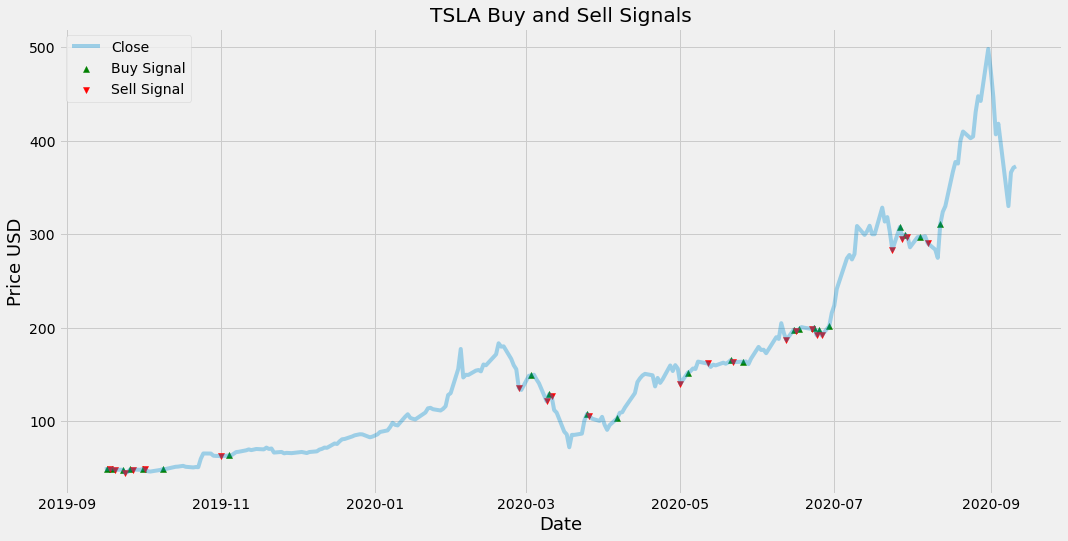

In [22]:
# plot the buy and sell prices
plt.figure(figsize=(16,8))
plt.plot(df['Close'], label='Close', alpha=0.35)
plt.scatter(df.index, df['Buy_Signal_Price'], label='Buy Signal', marker='^', alpha=1, color='green')
plt.scatter(df.index, df['Sell_Signal_Price'], label='Sell Signal', marker='v', alpha=1, color='red')
plt.title('TSLA Buy and Sell Signals')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Price USD', fontsize=18)
plt.legend(loc='upper left') 
plt.show() 